In [1]:
import re
import shutil
import subprocess
from pathlib import Path

import matplotlib as mpl
import matplotlib.pyplot as plt  # これを呼ばないと matplotlib.font_manager にアクセスできない

print("Installing IPA font...")
subprocess.check_output("apt-get update".split())
subprocess.check_output("apt-get install -y fonts-ipafont".split())

print("Clearing cache...")
subprocess.check_output("fc-cache -f".split())  # システムのフォントキャッシュを更新する。
mpl.font_manager._rebuild()  # matplotlib のフォントキャッシュを更新する。

# 設定ファイルをコピーする。
config_dir = Path(mpl.get_configdir())
config_dir.mkdir(exist_ok=True, parents=True)

default_config_path = Path(mpl.__file__).parent / "mpl-data/matplotlibrc"
config_path = config_dir / "matplotlibrc"
if not config_path.exists():
    print(f"Copying config file {default_config_path} to {config_path}")
    shutil.copyfile(default_config_path, config_path)
else:
    print(f"{config_path} already exists.")

with open(config_path, "r") as f:
    config = f.read()

# フォントを変更する。
fontname = "IPAGothic"
config, cnt = re.subn(
    r".*font\.family\s*:\s*.+", f"font.family: {fontname}", config, re.MULTILINE
)

if cnt:
    print("`font.family` changed successfully.")
    with open(config_path, "w") as f:
        f.write(config)
else:
    print("Failed to modify `font.family` in config file.")

Installing IPA font...
Clearing cache...
Copying config file /opt/conda/lib/python3.8/site-packages/matplotlib/mpl-data/matplotlibrc to /root/.config/matplotlib/matplotlibrc
`font.family` changed successfully.


AttributeError: 'PolyCollection' object has no property 'fontname'

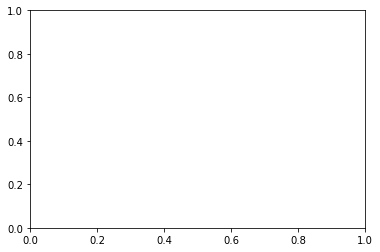

In [4]:
import numpy as np
import matplotlib.pyplot as plt

x = [1, 2, 3, 4, 5, 6, 7]
y1 = [1, 1, 2, 3, 5, 8, 13]
y2 = [0, 2, 4, 6, 8, 10, 12]
y3 = [1, 3, 5, 7, 9, 11, 13]

y = np.vstack([y1, y2, y3])

fig, ax = plt.subplots()
ax.stackplot(x, y1, y2, y3, labels=["フィボナッチ数列", "偶数", "奇数"], fontname="IPAGothic")
ax.legend(loc=2)
plt.show()

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt  # これを呼ばないと matplotlib.font_manager にアクセスできない


def show_avaiable_fonts():
    print("Avaiable fonts:")
    for font in mpl.font_manager.findSystemFonts():
        fontname = mpl.font_manager.FontProperties(fname=font).get_name()
        print(f"* {fontname}")


# 利用可能なフォントを表示する。
show_avaiable_fonts()

Avaiable fonts:
* IPAPMincho
* IPAMincho
* IPAGothic
* IPAMincho
* IPAGothic
* IPAPGothic
